## Supervised ML to predicted offer completed

### The final part of this project is about creating a supervised Machine Learning Model to predict which customers are more likely to complete an offer sent by Starbucks.

### The problem will be developed as a classification problem which will output 0 (the customer is not likely to complete an offer) or 1 (the customer is likely to complete an offer)


In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='retina'
pd.set_option('display.max_colwidth', -1)
import helpers as h

#### The main profile will be used to create the supervised model. The special profile has missing important demographics information which reduces its ability for prediction

In [2]:
main_cluster = pd.read_csv('data/main_cluster.csv')

In [3]:
pd.set_option('display.max_columns', 500)
main_cluster.head(10)

,Unnamed: 0,age,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,offer received_discount_10_2_10,offer received_informational_0_0_3,offer received_bogo_5_5_5,offer received_discount_10_2_7,offer viewed_bogo_10_10_7,offer viewed_bogo_10_10_5,offer viewed_informational_0_0_4,offer viewed_bogo_5_5_7,offer viewed_discount_20_5_10,offer viewed_discount_7_3_7,offer viewed_discount_10_2_10,offer viewed_informational_0_0_3,offer viewed_bogo_5_5_5,offer viewed_discount_10_2_7,offer completed_bogo_10_10_7,offer completed_bogo_10_10_5,offer completed_bogo_5_5_7,offer completed_discount_20_5_10,offer completed_discount_7_3_7,offer completed_discount_10_2_10,offer completed_bogo_5_5_5,offer completed_discount_10_2_7,avg_spending,transaction_count,sum_spending,invalid,bogo_received,bogo_viewed,rate_viewed_bogo,bogo_completed,rate_completed_viewed_bogo,rate_completed_received_bogo,discount_received,discount_viewed,rate_viewed_discount,discount_completed,rate_completed_viewed_discount,rate_completed_received_discount,informational_received,informational_viewed,rate_viewed_informational,offer_received_total,offer_viewed_total,offer_completed_total,rate_offer_viewed_overall,rate_offer_completed_received_overall,rate_offer_completed_viewed_overall,rate_offer_viewed_bogo_10_10_7,rate_offer_completed_viewed_bogo_10_10_7,rate_offer_completed_received_bogo_10_10_7,rate_offer_viewed_bogo_10_10_5,rate_offer_completed_viewed_bogo_10_10_5,rate_offer_completed_received_bogo_10_10_5,rate_offer_viewed_informational_0_0_4,rate_offer_viewed_bogo_5_5_7,rate_offer_completed_viewed_bogo_5_5_7,rate_offer_completed_received_bogo_5_5_7,rate_offer_viewed_discount_20_5_10,rate_offer_completed_viewed_discount_20_5_10,rate_offer_completed_received_discount_20_5_10,rate_offer_viewed_discount_7_3_7,rate_offer_completed_viewed_discount_7_3_7,rate_offer_completed_received_discount_7_3_7,rate_offer_viewed_discount_10_2_10,rate_offer_completed_viewed_discount_10_2_10,rate_offer_completed_received_discount_10_2_10,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio,gender_F,gender_M,gender_O,member_month_1,member_month_10,member_month_11,member_month_12,member_month_2,member_month_3,member_month_4,member_month_5,member_month_6,member_month_7,member_month_8,member_month_9,member_year_2013,member_year_2014,member_year_2015,member_year_2016,member_year_2017,member_year_2018,cluster
0,0610b486422d4921ae7d2bf64640c50b,55,112000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.670000,3.0,77.01,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,2.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2
1,78afa995795e4d85b5d9ceeca43f5fef,75,100000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.752857,7.0,159.27,1.0,3.0,3.0,1.0,2.0,0.666667,0.666667,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,1.0,1.0,4.0,4.0,2.0,1.000000,0.500000,0.500000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.333333,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,9
2,e2127556f4f64592b11af22de27a7932,68,70000.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,19.243333,3.0,57.73,0.0,1.0,1.0,1.0,1.0,1.000000,1.000000,2.0,2.0,1.000000,1.0,0.5,0.500000,1.0,0.0,0.0,4.0,3.0,2.0,0.750000,0.500000,0.666667,0.0,0.0,0.0,

In [4]:
main_cluster = main_cluster.set_index(main_cluster.columns[0])

In [5]:
main_cluster.shape

(14808, 104)

In [6]:
main_cluster.columns.values

array(['age', 'income', 'offer received_bogo_10_10_7',
       'offer received_bogo_10_10_5',
       'offer received_informational_0_0_4', 'offer received_bogo_5_5_7',
       'offer received_discount_20_5_10', 'offer received_discount_7_3_7',
       'offer received_discount_10_2_10',
       'offer received_informational_0_0_3', 'offer received_bogo_5_5_5',
       'offer received_discount_10_2_7', 'offer viewed_bogo_10_10_7',
       'offer viewed_bogo_10_10_5', 'offer viewed_informational_0_0_4',
       'offer viewed_bogo_5_5_7', 'offer viewed_discount_20_5_10',
       'offer viewed_discount_7_3_7', 'offer viewed_discount_10_2_10',
       'offer viewed_informational_0_0_3', 'offer viewed_bogo_5_5_5',
       'offer viewed_discount_10_2_7', 'offer completed_bogo_10_10_7',
       'offer completed_bogo_10_10_5', 'offer completed_bogo_5_5_7',
       'offer completed_discount_20_5_10',
       'offer completed_discount_7_3_7',
       'offer completed_discount_10_2_10', 'offer completed_bogo_5_5

### Feature Processing
we need to create training data and labels in order to use classification. <br/>
we will be predicting if a customer will complete an offer given offer details, demographics information and membership details. The information related to offer viewed is omitted due to the fact that in real world this information might not be available to the company when sending offers

In [7]:
features = ['age',
 'avg_spending',
 'gender_F',
 'gender_M',
 'gender_O',
 'income',
 'informational_received',
 'invalid',
 'member_year_2013',
 'member_year_2014',
 'member_year_2015',
 'member_year_2016',
 'member_year_2017',
 'member_year_2018',
 'offer received_bogo_10_10_5',
 'offer received_bogo_10_10_7',
 'offer received_bogo_5_5_5',
 'offer received_bogo_5_5_7',
 'offer received_discount_10_2_10',
 'offer received_discount_10_2_7',
 'offer received_discount_20_5_10',
 'offer received_discount_7_3_7',
 'offer received_informational_0_0_3',
 'offer received_informational_0_0_4',
 'member_month_1',
 'member_month_2',
 'member_month_3',
 'member_month_4',
 'member_month_5',
 'member_month_6',
 'member_month_7',
 'member_month_8',
 'member_month_9',
 'member_month_10',
 'member_month_11',
 'member_month_12',
 'sum_spending',
 'transaction_count']

In [8]:
#creating a features column
X = main_cluster[features]

In [9]:
X.columns

Index(['age', 'avg_spending', 'gender_F', 'gender_M', 'gender_O', 'income',
       'informational_received', 'invalid', 'member_year_2013',
       'member_year_2014', 'member_year_2015', 'member_year_2016',
       'member_year_2017', 'member_year_2018', 'offer received_bogo_10_10_5',
       'offer received_bogo_10_10_7', 'offer received_bogo_5_5_5',
       'offer received_bogo_5_5_7', 'offer received_discount_10_2_10',
       'offer received_discount_10_2_7', 'offer received_discount_20_5_10',
       'offer received_discount_7_3_7', 'offer received_informational_0_0_3',
       'offer received_informational_0_0_4', 'member_month_1',
       'member_month_2', 'member_month_3', 'member_month_4', 'member_month_5',
       'member_month_6', 'member_month_7', 'member_month_8', 'member_month_9',
       'member_month_10', 'member_month_11', 'member_month_12', 'sum_spending',
       'transaction_count'],
      dtype='object')

**The target data for this problem is offer completion details. The offer_completed_total contains total offers completed by a person. This will be recoded into 0 (no offers completed) and 1 (at lease one offer completed) to set it up as a binary classification problem**

In [95]:
target = main_cluster['offer_completed_total']

In [96]:
target.describe()

count    14808.000000
mean     1.559495    
std      1.348895    
min      0.000000    
25%      0.000000    
50%      1.000000    
75%      2.000000    
max      6.000000    
Name: offer_completed_total, dtype: float64

In [11]:
#code to encode offers completed into 0 and 1
def code(x):
    if x > 0:
        x = 1
    else:
        x = 0
    return x

In [12]:
#creating the target column
y = main_cluster['offer_completed_total'].apply(code)

In [13]:
#splitting data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
#standarizing the input data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)  # estimate the parameters mu and sigma for each features
X_train_std = sc.transform(X_train) #standarize the data using the above parameters
X_test_std = sc.transform(X_test)  #used same scaling parameters to standarize both train and test data

## Logistic Regression - classification - Baseline Model
### A baseline logistic regression model will be created to check the accuracy of prediction. Later on more complex models will be developed and logistic regression will be used as baseline model

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0,solver = 'liblinear')
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
prediction = lr.predict(X_test_std)

In [62]:
type(prediction)

numpy.ndarray

In [69]:
for class_name, class_count in zip(np.unique(prediction),np.bincount(prediction)):
    print(class_name,class_count)

0 1045
1 3398


### The result is an imbalanced set. Accuracy is not the correct metrics
### We will address this issue at a later stage when we use more advanced classification method

In [68]:
np.unique(prediction)

array([0, 1])

In [17]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.8449246004951609


In [18]:
metrics.average_precision_score(y_test,prediction)

0.8578985648128603

In [19]:
metrics.confusion_matrix(y_test,prediction)

array([[ 800,  444],
       [ 245, 2954]])

In [20]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      1244
           1       0.87      0.92      0.90      3199

    accuracy                           0.84      4443
   macro avg       0.82      0.78      0.80      4443
weighted avg       0.84      0.84      0.84      4443



In [21]:
lr.score(X_test_std,y_test)

0.8449246004951609

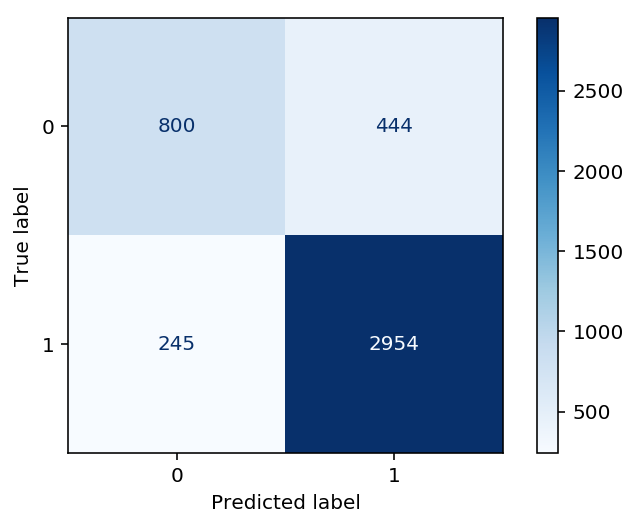

In [27]:
metrics.plot_confusion_matrix(lr,X_test_std,y_test,cmap = 'Blues',values_format = '2g')

The accuracy for logistic regression comes out to be 85% <br/>
After a quick baseline models, more advanced models like SVM and Random Forest will be tested


## Random Forest Classification
### A Random Forest model is created to check for important features. Features which are relatively unimportant to prediction will be dropped

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_std,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
rf.score(X_test_std,y_test)

0.8658564033310826

In [32]:
sample_leaf_options = [1,2,3,4,5,10,20]
for leaf_size in sample_leaf_options :
    rf = RandomForestClassifier(n_estimators = 200, n_jobs = -1,random_state =50, min_samples_leaf = leaf_size)
    rf.fit(X_train_std,y_train)
    print (leaf_size)
    print ("Accuracy : ", rf.score(X_test_std,y_test))

1
Accuracy :  0.8651811838847625
2
Accuracy :  0.866081476479856
3
Accuracy :  0.866081476479856
4
Accuracy :  0.8647310375872158
5
Accuracy :  0.8647310375872158
10
Accuracy :  0.8624803060994823
20
Accuracy :  0.8575286968264686


In [33]:
#calculating feature importances
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

In [34]:
from sklearn import metrics
print(metrics.classification_report(rf.predict(X_test_std), y_test))

              precision    recall  f1-score   support

           0       0.60      0.85      0.70       873
           1       0.96      0.86      0.91      3570

    accuracy                           0.86      4443
   macro avg       0.78      0.85      0.80      4443
weighted avg       0.89      0.86      0.87      4443



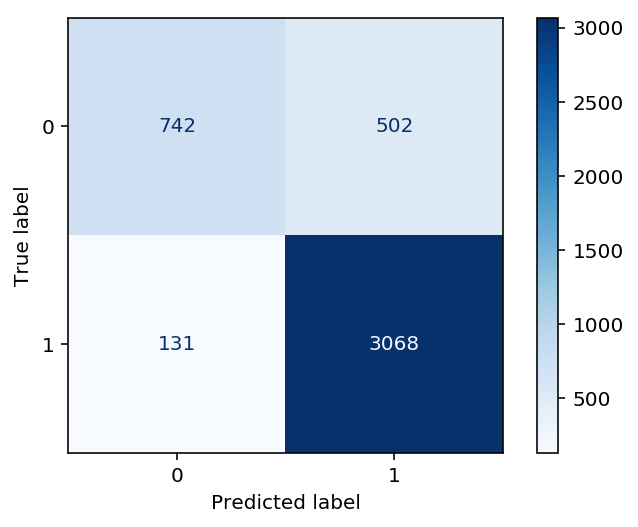

In [35]:
metrics.plot_confusion_matrix(rf,X_test_std,y_test,cmap = 'Blues',values_format = '2g')

Text(0.5, 0, 'Feature Importance Score')

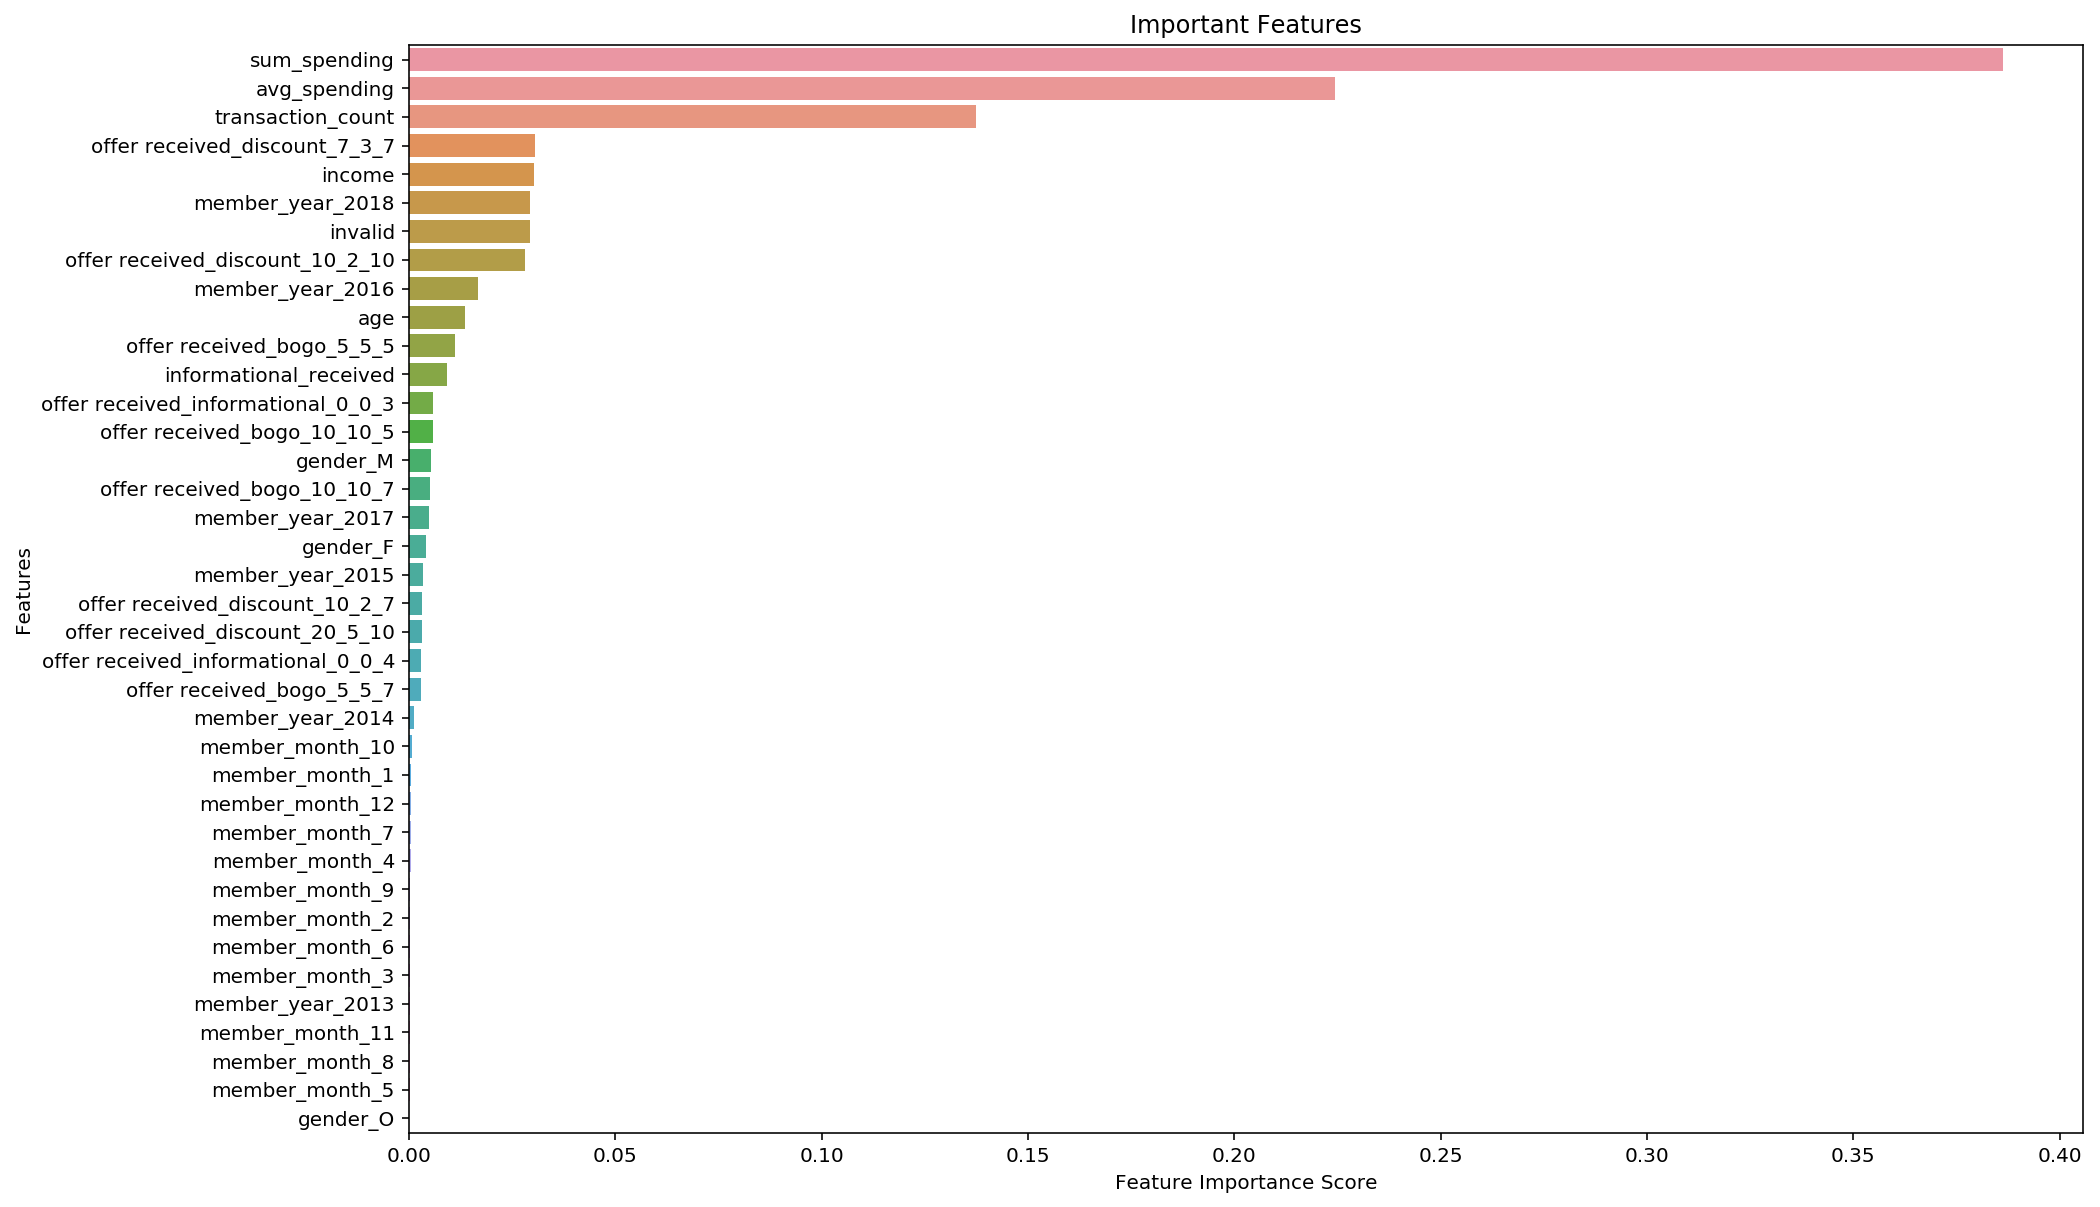

In [36]:
#plotting feature importances
f, ax = plt.subplots(1,1, figsize=(15,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
ax.set_title('Important Features')
ax.set_ylabel('Features')
ax.set_xlabel('Feature Importance Score')

#### The features related to membership month does not seem to be very important. The gender category 'O' is also not very informative. SVM model will be created after removing these non-important features. Basically features related to demographics, income, spending and offer details seem to be very important in predicting whether a potential customer will complete an offer sent by Starbucks

## SVM

In [38]:
#creating features list after removing unimportant features
features_updated = ['age',
 'avg_spending',
 'gender_F',
 'gender_M',
 'gender_O',
 'income',
 'informational_received',
 'invalid',
 'member_year_2013',
 'member_year_2014',
 'member_year_2015',
 'member_year_2016',
 'member_year_2017',
 'member_year_2018',
 'offer received_bogo_10_10_5',
 'offer received_bogo_10_10_7',
 'offer received_bogo_5_5_5',
 'offer received_bogo_5_5_7',
 'offer received_discount_10_2_10',
 'offer received_discount_10_2_7',
 'offer received_discount_20_5_10',
 'offer received_discount_7_3_7',
 'offer received_informational_0_0_3',
 'offer received_informational_0_0_4',
 'sum_spending',
 'transaction_count']

In [39]:
X1 = main_cluster[features_updated]

In [40]:
#splitting data into train and test sets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

In [41]:
#standarizing the input data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X1_train)  # estimate the parameters mu and sigma for each features
X1_train_std = sc.transform(X1_train) #standarize the data using the above parameters
X1_test_std = sc.transform(X1_test)  #used same scaling parameters to standarize both train and test data

In [42]:
from sklearn.svm import SVC

In [43]:
svm = SVC(kernel = 'rbf',gamma = 'auto')
svm.fit(X1_train_std,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
#accuracy score
svm.score(X1_test_std,y_test)

0.8654062570335359

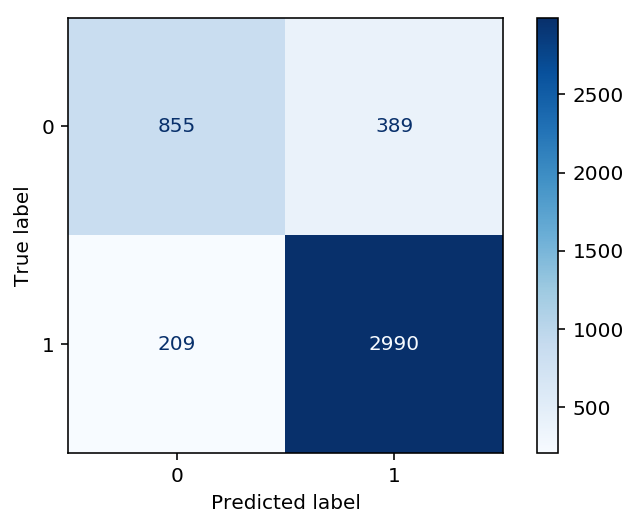

In [45]:
metrics.plot_confusion_matrix(svm,X1_test_std,y_test,cmap = 'Blues',values_format = '2g')

### Classification Metrics

### The goal of this model is for starbucks to target customers in order to increase chances of completion rate. It does not matter if the company wrongly targets someone who is not likely to make purchases. It is important to target customers who are more likely to accept offers. Accuracy score might not be the best metrics under these circumstances. In order to increase the True positive rate, recall might be a better scoring metrics to optimize

### Finding best Hyperparameter for SVM model through a grid search

In [47]:
from sklearn.grid_search import GridSearchCV
param_grid = {'C': [1,5, 10, 50],'gamma': [0.001, 0.005, 0.05, 0.5]}
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='recall', cv=10, n_jobs=-1,verbose = True)
gs = gs.fit(X1_train_std, y_train)
print(gs.best_score_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  9.1min finished


0.9858660940818051


In [48]:
gs.best_params_

{'C': 1, 'gamma': 0.5}

In [49]:
gs.get_params()

{'cv': 10,
 'error_score': 'raise',
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'fit_params': {},
 'iid': True,
 'n_jobs': -1,
 'param_grid': {'C': [1, 5, 10, 50], 'gamma': [0.001, 0.005, 0.05, 0.5]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'scoring': 'recall',
 'verbose': True}

In [50]:
metrics.confusion_matrix(y_test,gs.predict(X1_test_std))

array([[ 153, 1091],
       [  55, 3144]])

In [51]:
print(metrics.classification_report(y_test,gs.predict(X1_test_std)))

              precision    recall  f1-score   support

           0       0.74      0.12      0.21      1244
           1       0.74      0.98      0.85      3199

    accuracy                           0.74      4443
   macro avg       0.74      0.55      0.53      4443
weighted avg       0.74      0.74      0.67      4443



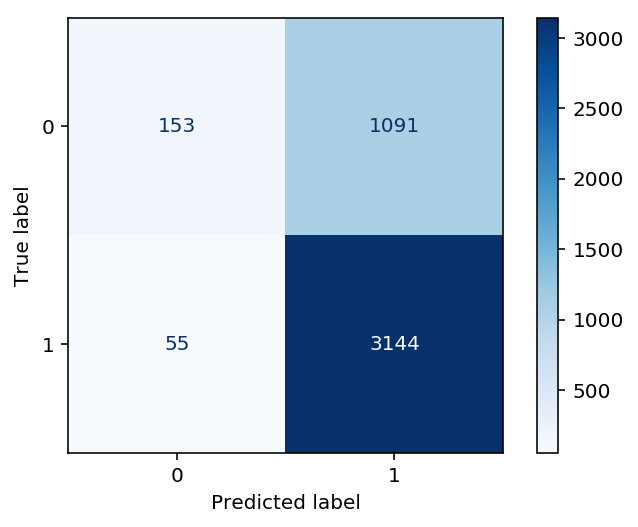

In [52]:
metrics.plot_confusion_matrix(gs,X1_test_std,y_test,cmap = 'Blues',values_format = '2g')

In [53]:
gs.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
clf = gs.best_estimator_

In [56]:
clf.fit(X1_train_std,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
metrics.accuracy_score(clf.predict(X1_test_std),y_test)

0.7420661715057394

In [59]:
print(metrics.classification_report(y_test,clf.predict(X1_test_std)))

              precision    recall  f1-score   support

           0       0.74      0.12      0.21      1244
           1       0.74      0.98      0.85      3199

    accuracy                           0.74      4443
   macro avg       0.74      0.55      0.53      4443
weighted avg       0.74      0.74      0.67      4443



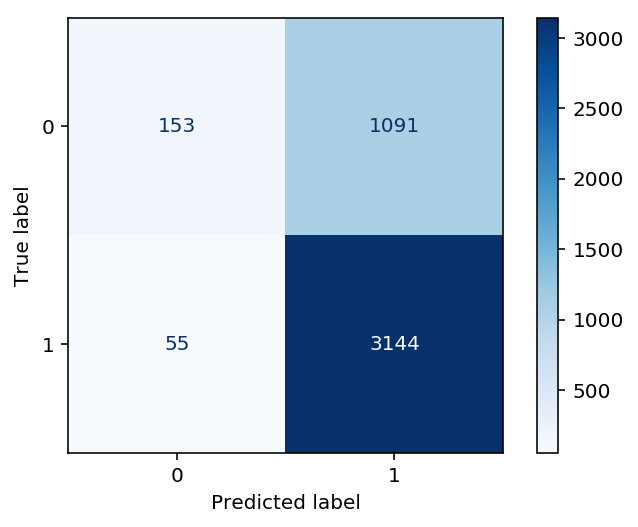

In [60]:
metrics.plot_confusion_matrix(clf,X1_test_std,y_test,cmap = 'Blues',values_format = '2g')

### Conclusion

Although the accuracy score drops to 74%, overall the above model is best for predicting customers who are more likely to complete the offers sent by Starbucks. It is important for Starbucks to correctly predict customers who are likely to make purchases. Sending offers to wrong customers is a low cost affair. It won't affect Starbucks much. However, losing on potential customers would not make good business sense.

For this problem, simple classification models are good enough. For problems, which are more complex, with many features, more complex models like Xgboost would be more useful.